<hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Tree data structures
- Decision trees

<hr/>

In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


<h1><font color="darkblue">Trees</font></h1>

- Recursive data structures

> **Recursion**<br/>
> To know recursion, you must first know recursion.
> <br>
> <br>
> **Recursive Acronyms** <br/>
>   GNU: GNU is Not Unix <br/>
>   LAME: LAME Ain't an MP3 Encoder<br/>
>   PIP: PIP Installs Packages


In [2]:
# Fibonacci sequence: F_n = F_{n-1} + F_{n-2}, F_1 = 1, F_0 = 0
def f(n):
    if n<0: print("Incorrect input")
    elif n == 0: return 0
    elif n == 1: return 1
    else: return f(n-1) + f(n-2)

In [3]:
f(3)

2

In [4]:
func = np.vectorize(f)
func(range(10))

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21, 34])

### Binary Tree
- Connected nodes - special tree structure

    - There is one **root** node
    - Every node has a maximum of two **children** (left, right)
    - The **leaves** are the **terminal** nodes

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Binary_tree.svg" alt="Binary tree.svg" height="250" width="200" align=left>
<!--
<img src="files/Binary_tree.svg" alt="Binary tree.svg" height="250" width="200" align=left>
-->

In [5]:
class node(object):
    
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
   
    def __repr__(self, i=0):
        s = '➥ '*i + repr(self.data) + '\n'
        if self.left is not None:  
            s += self.left.__repr__(i+1)
        if self.right: # same thing
            s += self.right.__repr__(i+1)
        return s

In [6]:
root = node(2, 
            node(7,
                 node(2), 
                 node(6, node(5), node(11))),
            node(5, None,
                 node(9, node(4)))
           )

print(repr(root))

2
➥ 7
➥ ➥ 2
➥ ➥ 6
➥ ➥ ➥ 5
➥ ➥ ➥ 11
➥ 5
➥ ➥ 9
➥ ➥ ➥ 4



In [7]:
print (root.left.left.data)

2


In [8]:
root.left.left.left = node(99)
root.left.left.right = node(999)
root

2
➥ 7
➥ ➥ 2
➥ ➥ ➥ 99
➥ ➥ ➥ 999
➥ ➥ 6
➥ ➥ ➥ 5
➥ ➥ ➥ 11
➥ 5
➥ ➥ 9
➥ ➥ ➥ 4

In [9]:
root.right.right.data

9

### $n$-ary Tree

In [10]:
class node(object):
    
    def __init__(self, data, children=[]):
        self.data = data
        self.children = children
        
    def __repr__(self, i=0):
        s = f"{'➥ '*i}{self.data}{os.linesep}" # f-String!
        for child in self.children:
            s += child.__repr__(i+1)
        return s

In [11]:
# build a tree
root = node(2, [ 
            node(7, [
                node(2),
                node(6, [
                        node(5), 
                        node(11)])]),
            node(5, [
                node(9, [node(4)])])
            ]);

root

2
➥ 7
➥ ➥ 2
➥ ➥ 6
➥ ➥ ➥ 5
➥ ➥ ➥ 11
➥ 5
➥ ➥ 9
➥ ➥ ➥ 4

In [12]:
# add one child node for root
root.children.append(node(999))
root

2
➥ 7
➥ ➥ 2
➥ ➥ 6
➥ ➥ ➥ 5
➥ ➥ ➥ 11
➥ 5
➥ ➥ 9
➥ ➥ ➥ 4
➥ 999

In [24]:
# add one child node for the left child of the root
root.children[0].children.append(node(99))
root

2
➥ 7
➥ ➥ 2
➥ ➥ 6
➥ ➥ ➥ 5
➥ ➥ ➥ 11
➥ ➥ 99
➥ 5
➥ ➥ 9
➥ ➥ ➥ 4
➥ 999

### Trees are everywhere!

- Searching

> $k$d-trees, B-tree, R-tree, ball trees, etc...
> <br>
> E.g., searching for neighbors

- Decisions 

> E.g., for classification 

### $k$-d tree

- Balanced tree
- Split along axes

Constructed from points, see Figure from Wikipedia<br/>
{ (2,3), (5,4), (9,6), (4,7), (8,1), (7,2) }


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Kdtree_2d.svg/1200px-Kdtree_2d.svg.png" alt="Kdtree 2d.svg" width=300>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Tree_0001.svg/1200px-Tree_0001.svg.png" alt="Tree 0001.svg" width=300>


##### <h1><font color="darkblue">Decision Tree</font></h1>

- Recursive partitioning of the training dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg" alt="Decision Tree.jpg" width=400>

> At a given node with dataset $D$ we look for the
> best split 
> <br>
> <br>
> $\theta = $ (feature $j$, threshold $t$)
> <br>
> <br>
> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal **impurity**
> <br>
> <br>
> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> we classify the observations in the given node to class $k^* = \operatorname{argmax}_{k=1}^K \hat{p}_k$ where

> $\displaystyle \hat{p}_k = \frac{1}{n} \sum_{x_i\in D} I(y_i=k)$

> E.g., Gini with $K$ classes in the partition $D$
> <br>
> <br>
>$\displaystyle H(D) = \sum_{k=1}^K \hat{p}_k (1-\hat{p}_k)$
> <br>
> <br>
> Or variance for regression

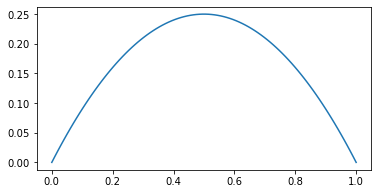

In [13]:
x = np.linspace(0,1,100)
figure(figsize=(6,3))
plot(x, x*(1-x))

### Toy Example

- Calculate by hand...

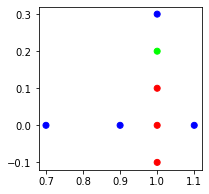

In [14]:
X = np.array([[.7,0],[1,.3],[1.1,0],[.9,0], 
              [1,0],[1,-.1],[1,.1], 
              [1,.2]], 
             dtype=np.float64)
c = np.array([ 0,0,0,0, 1,1,1, 2], dtype=np.float64)
figure(figsize(3,3))
subplot(111,aspect='equal')
scatter(X[:,0],X[:,1],c=c,cmap=cm.brg);

### Gini impurity of a partition

- We have 3 classes total hence the sum for the entire dataset is

>$ \displaystyle H = \frac{4}{8}\left(1\!-\!\frac{4}{8}\right) 
     + \frac{3}{8}\left(1\!-\!\frac{3}{8}\right) 
     + \frac{1}{8}\left(1\!-\!\frac{1}{8}\right) $ $ \displaystyle = \frac{16}{64}
     + \frac{15}{64}
     + \frac{7}{64}
     = \frac{19}{32} = 0.59375$
     
- This is the root of the tree

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X,c)

print (clf.tree_.n_node_samples)
print (clf.tree_.impurity)
print (clf.tree_.feature)
print (clf.tree_.threshold)

[8 2 6]
[0.59375    0.         0.61111111]
[ 0 -2 -2]
[ 0.94999999 -2.         -2.        ]


### Impurity of 2 partitions after first split

- The root partition contains 3 classes hence the sum is

>$ \displaystyle H_{\rm{}left} = \frac{2}{2}\left(1\!-\!\frac{2}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right) + \frac{0}{2}\left(1\!-\!\frac{0}{2}\right)= 0$

>$ \displaystyle H_{\rm{}right} = \frac{3}{6}\left(1\!-\!\frac{3}{6}\right) 
     + \frac{2}{6}\left(1\!-\!\frac{2}{6}\right) 
     + \frac{1}{6}\left(1\!-\!\frac{1}{6}\right) $ 
 $ \displaystyle = \frac{9}{36}
     + \frac{8}{36}
     + \frac{5}{36}
     = \frac{11}{18} $ $\approx 0.61111111$

> Cf. numbers above

- Note importance of weighting by partition sizes!

### feature importance

- importance of a node $j$ 

> $ \displaystyle ni_j = \frac{n}{N} H(D) - \frac{n_{\rm{}left}}{N}H_{\rm{}left} - \frac{n_{\rm{}right}}{N}H_{\rm{}right}$

- feature importance of feature $i$

> $ \displaystyle fi_i = \frac{\sum_{j:\rm{}node j split on feature i}ni_j}{\sum_{j \in \rm{}all nodes} ni_j}$




In [16]:
print(clf.feature_importances_)

[1. 0.]


In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,c)

print (clf.tree_.n_node_samples)
print (clf.tree_.impurity)
print (clf.tree_.feature)
print (clf.tree_.threshold)
print (clf.feature_importances_)

[8 2 6 4 2]
[0.59375    0.         0.61111111 0.375      0.5       ]
[ 0 -2  1 -2 -2]
[ 0.94999999 -2.          0.15       -2.         -2.        ]
[0.48148148 0.51851852]


In [18]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.95
|   |--- class: 0.0
|--- feature_0 >  0.95
|   |--- feature_1 <= 0.15
|   |   |--- class: 1.0
|   |--- feature_1 >  0.15
|   |   |--- class: 0.0



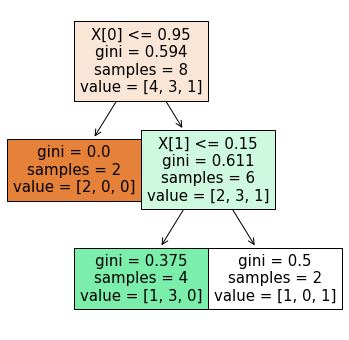

In [19]:
figure(figsize=(6,6))
tree.plot_tree(clf, filled=True)
plt.show()

### Example

Use the sklearn routines to 

- Load the iris dataset and use the first 2 features
- Run the decision tree classifier with different depths
- Use cross-validation and plot the results

<a href="https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py">
    <img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_001.png" align=left width=500 \>
</a>

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2].copy()  # only first 2 features
c = iris.target.copy()      # copy
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

print ('New classes:', np.unique(c))
print ('New data:', X.shape)

New classes: [0 1]
New data: (100, 2)


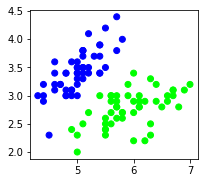

In [21]:
subplot(111,aspect='equal'); 
scatter(X[:,0],X[:,1],c=c,cmap=cm.brg);

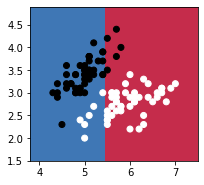

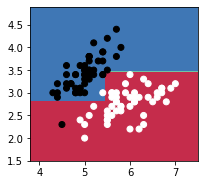

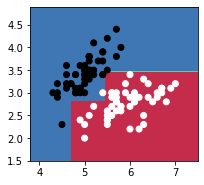

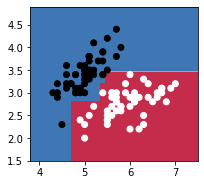

In [22]:
# grid of points within the limits
h = 0.01
x,y = meshgrid(arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]

# decision-surfaces as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    z = clf.fit(X,c).predict(grid).reshape(x.shape)
    figure(figsize=(3,3)); subplot(111,aspect='equal')
    contourf(x, y, z, cmap=cm.Spectral_r)
    scatter(X[:,0], X[:,1], c=c, cmap=cm.gray);

<h1><font color="darkblue">Random Forest</font></h1>

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive)

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those

- A randomized tree will not be optimal but much faster to build